Experiments destripeing Ultramicroscope data volumes using [Pystripe](https://github.com/chunglabmit/pystripe)

In [13]:
import napari
from napari.utils import nbscreenshot
import numpy as np
import tifffile
import pystripe
import tqdm
%gui qt

In [3]:
vol = tifffile.imread("C:/Users/Volker/Data/JesseDiCello/pystripetest/Sample/T_4.tif")

as far as I could tell pystripe works on 2D images, so we process the volume slice by slice

In [8]:
destriped = []
for im in tqdm.tqdm(vol):
    destriped.append(pystripe.filter_streaks(im, sigma=[256, 256]))
destriped_vol=np.array(destriped)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:47<00:00,  5.40it/s]


In [10]:
tifffile.imwrite("C:/Users/Volker/Data/JesseDiCello/pystripetest/Sample/T4-pystripe.tif", 
                 destriped_vol)

interactively visualize the results

In [14]:
v = napari.Viewer()
v.add_image(vol, scale=(8,1,1), name="raw", gamma=1.2)
v.add_image(destriped_vol, scale=(8,1,1), name="destriped", gamma=1.2)

<Image layer 'destriped' at 0x217a45d6bc8>

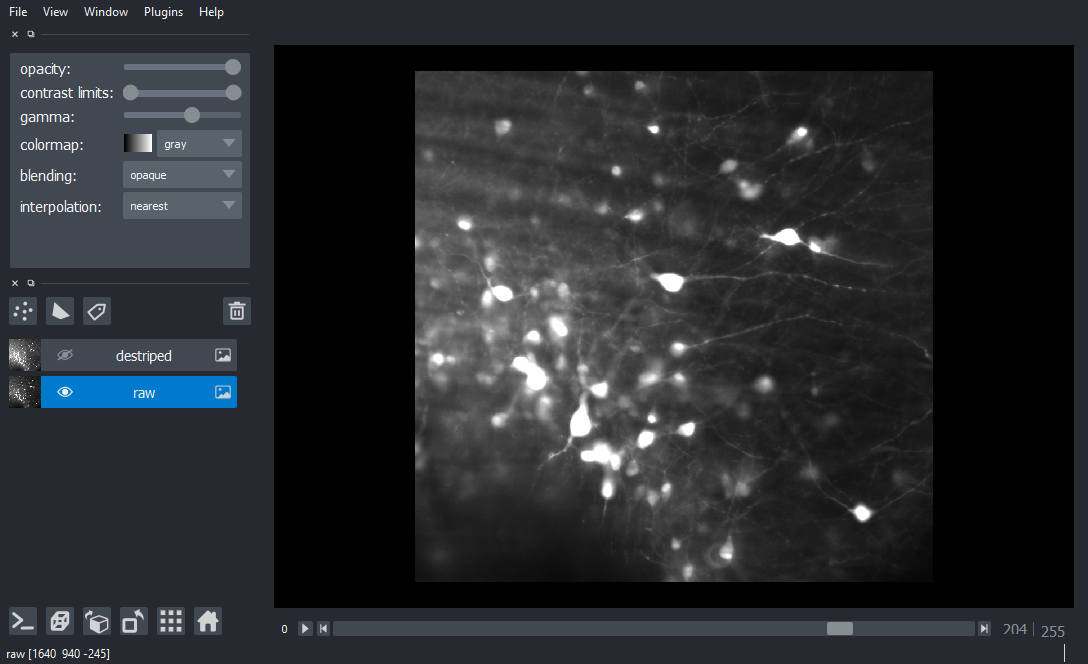

In [16]:
nbscreenshot(v)

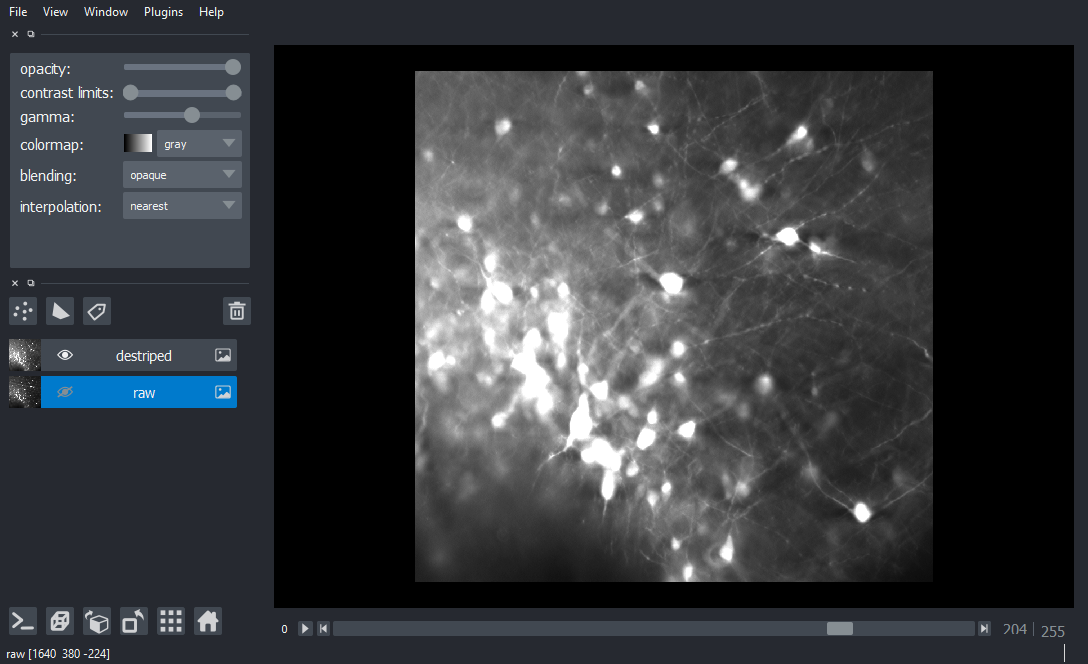

In [18]:
nbscreenshot(v)

If you inspect the destriped result, you will notice that some of the fine neurite structures close to the bright soma disapper, see for example the bright some slightly above the centre of the image.

I played around with the bandwith parameter a bit:

In [19]:
destriped128 = []
for im in tqdm.tqdm(vol):
    destriped128.append(pystripe.filter_streaks(im, sigma=[128, 128]))
destriped128_vol=np.array(destriped128)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:42<00:00,  6.01it/s]


In [20]:
tifffile.imwrite("C:/Users/Volker/Data/JesseDiCello/pystripetest/Sample/T4-pystripe128.tif", 
                 destriped128_vol)

In [22]:
v.add_image(destriped128_vol, scale=(8,1,1), name="destriped_bw128", gamma=1.2)

<Image layer 'destriped_bw128' at 0x217a4cd2848>

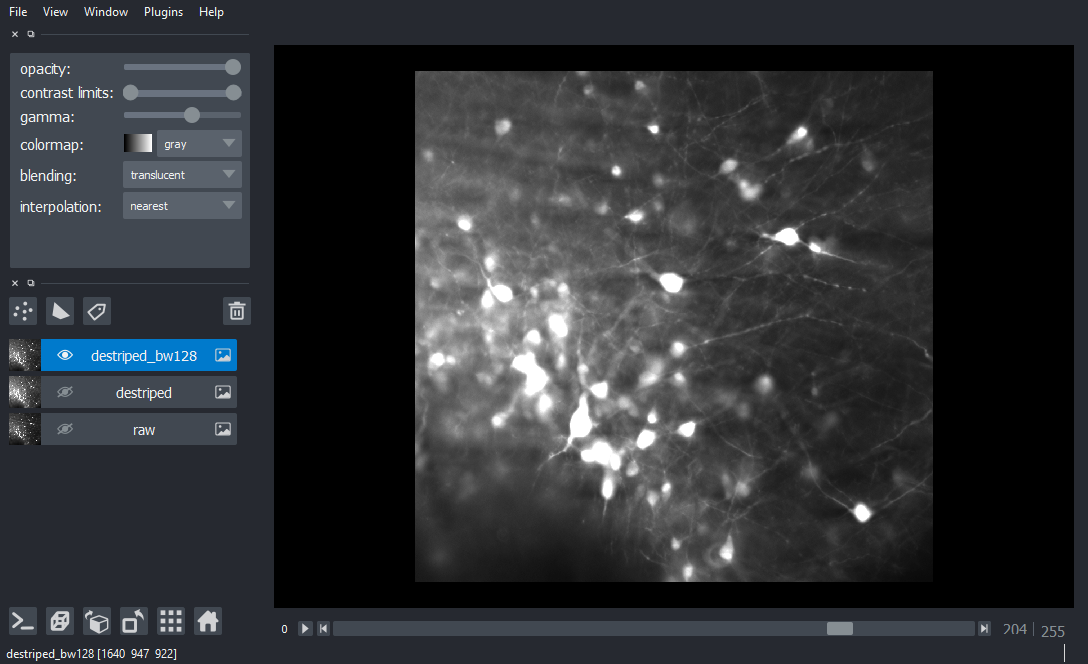

In [24]:
nbscreenshot(v)

with lower values for bandwith, the striping is not removed as effectively but some of the smaller structures are better (not perfectly) preserved